Implementacja bibliotek

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot
import pylab

### Zadanie 1 - metoda splotowa

In [2]:
def Erlang(M, n, l): # n naturalne, l > 0
    '''Suma x_1,...,x_n o rozkładzie wykładniczym (1/l)
    jest równa co do rozkładu rozkładowi Erlanga(n, l)'''
    X = []
    for i in range(M):
        x = 0
        for j in range(n):
            x_j = np.random.exponential(1/l)
            x += x_j
        X.append(x)
    return X

In [10]:
data = Erlang(5000,4,1)

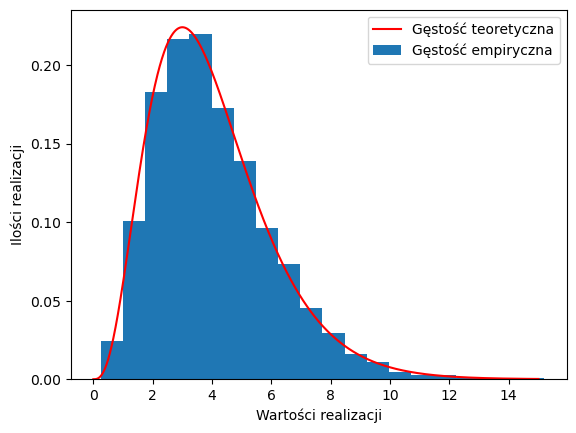

In [11]:
# gęstość
x = np.linspace(0,15,1000)
plt.plot(x, st.erlang.pdf(x,4,0,1), label='Gęstość teoretyczna', color='r')
plt.hist(data, bins=20, density=True, label='Gęstość empiryczna')
plt.legend()
plt.xlabel('Wartości realizacji')
plt.ylabel('Ilości realizacji')
plt.show()

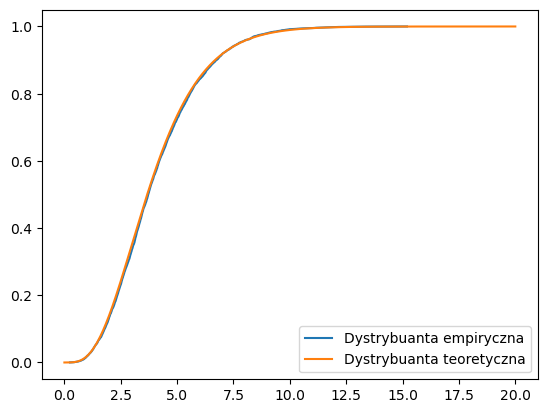

In [12]:
# dystrybuanta
x1 = np.linspace(0,20,1000)
ecdf = ECDF(data)
plt.plot(ecdf.x, ecdf.y, label='Dystrybuanta empiryczna')
plt.plot(x1, st.erlang.cdf(x1,4,0,1), label='Dystrybuanta teoretyczna')
plt.legend()
plt.show()

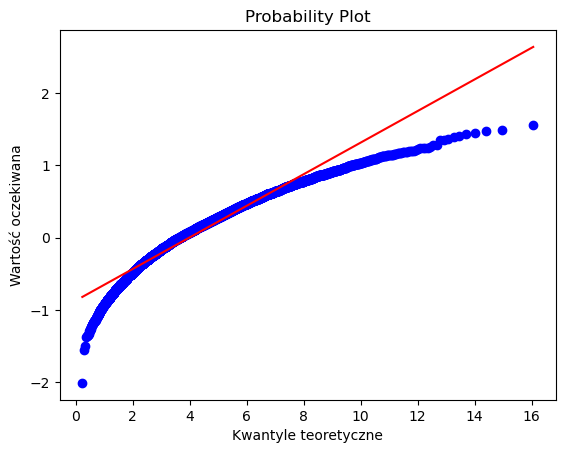

In [32]:
# qqplot
st.probplot(data, dist=st.erlang(4), plot=pylab)
pylab.xlabel("Kwantyle teoretyczne")
pylab.ylabel("Wartość oczekiwana")
pylab.show()

In [13]:
# charakterystyki liczbowe
ex_emp = np.mean(data)
ex_teo = st.erlang.mean(4,0,1)
print('Wartości oczekiwane: empiryczna = ',ex_emp,'teoretyczna =', ex_teo)
var_emp = np.var(data)
var_teo = st.erlang.var(4,0,1)
print('Wariancje: empiryczna = ',var_emp,'teoretyczna =', var_teo)
skew_emp = st.skew(data)
skew_teo = 2/np.sqrt(4)
print('Skośności: empiryczna = ',skew_emp,'teoretyczna =', skew_teo)
kurt_emp = st.kurtosis(data)
kurt_teo = 6/4
print('Kurtozy: empiryczna = ',kurt_emp,'teoretyczna =', kurt_teo)

Wartości oczekiwane: empiryczna =  4.0441070031604305 teoretyczna = 4.0
Wariancje: empiryczna =  3.925510588155409 teoretyczna = 4.0
Skośności: empiryczna =  0.919889576700821 teoretyczna = 1.0
Kurtozy: empiryczna =  1.1648968216954945 teoretyczna = 1.5


### Zadanie 2 - metoda Boxa-Mullera

In [14]:
def Box_Muller(n, mu, sigma):
    X = []
    for i in range(n):
        U_1 = np.random.uniform(0,1)
        U_2 = np.random.uniform(0,1)
        X.append(mu + sigma*np.sqrt(-2*np.log(U_1))*np.cos(2*np.pi*U_2))
    return np.array(X)

In [15]:
data = Box_Muller(10000,0,np.sqrt(0.2))

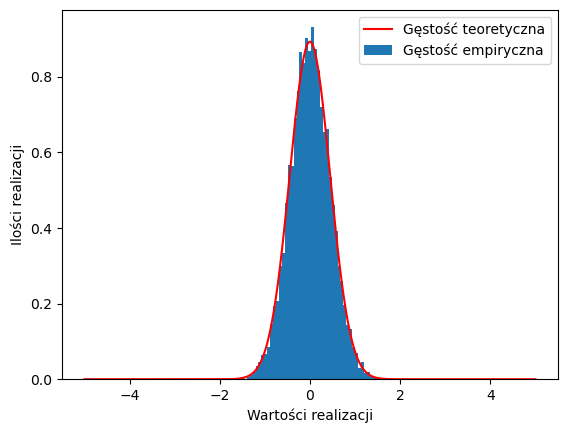

In [16]:
# gęstość
x = np.linspace(-5,5,1000)
plt.plot(x, st.norm.pdf(x, 0, np.sqrt(0.2)), label='Gęstość teoretyczna', color='r')
plt.hist(data, bins=50, density=True, label='Gęstość empiryczna')
plt.legend()
plt.xlabel('Wartości realizacji')
plt.ylabel('Ilości realizacji')
plt.show()

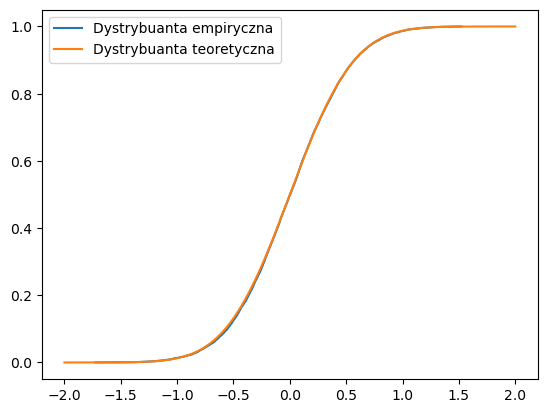

In [17]:
# dystrybuanta
x1 = np.linspace(-2,2,1000)
ecdf = ECDF(data)
plt.plot(ecdf.x, ecdf.y, label='Dystrybuanta empiryczna')
plt.plot(x1, st.norm.cdf(x1, 0, np.sqrt(0.2)), label='Dystrybuanta teoretyczna')
plt.legend()
plt.show()

In [18]:
# charakterystyki liczbowe
ex_emp = np.mean(data)
ex_teo = st.norm.mean(0, np.sqrt(0.2))
print('Wartości oczekiwane: empiryczna = ',ex_emp,'teoretyczna =', ex_teo)
var_emp = np.var(data)
var_teo = st.norm.var(0, np.sqrt(0.2))
print('Wariancje: empiryczna = ',var_emp,'teoretyczna =', var_teo)
skew_emp = st.skew(data)
skew_teo = 0
print('Skośności: empiryczna = ',skew_emp,'teoretyczna =', skew_teo)
kurt_emp = st.kurtosis(data)
kurt_teo = 0
print('Kurtozy: empiryczna = ',kurt_emp,'teoretyczna =', kurt_teo)

Wartości oczekiwane: empiryczna =  0.004784121360870966 teoretyczna = 0.0
Wariancje: empiryczna =  0.1974302936208014 teoretyczna = 0.19999999999999998
Skośności: empiryczna =  0.005461139098498511 teoretyczna = 0
Kurtozy: empiryczna =  0.032668672281668254 teoretyczna = 0


Text(0, 0.5, 'Wartość oczekiwana')

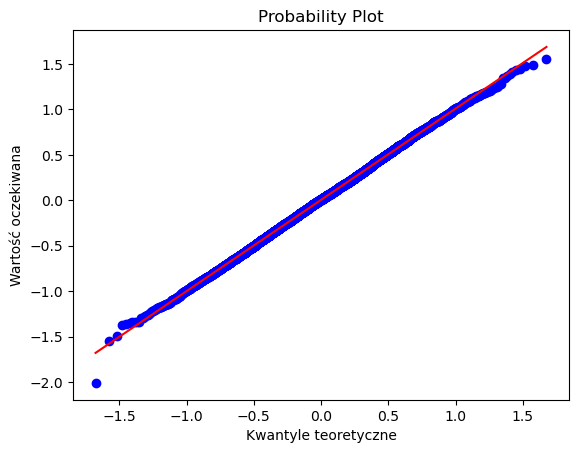

In [33]:
# qqplot
st.probplot(data, dist=st.norm(0,np.sqrt(0.2)), plot=pylab)
pylab.xlabel("Kwantyle teoretyczne")
pylab.ylabel("Wartość oczekiwana")

### Zadanie 3 - metoda biegunowa

In [20]:
def biegunowa(n, mu, sigma):
    X = []
    for i in range(n):
        u_1 = np.random.uniform(-1,1)
        u_2 = np.random.uniform(-1,1)
        R_2 = u_1**2 + u_2**2
        if R_2 <= 1:
            X.append(mu + sigma*(np.sqrt(-2*np.log(R_2)/R_2)*u_1))
    return np.array(X)

In [21]:
data = biegunowa(10000, 0, np.sqrt(0.2))

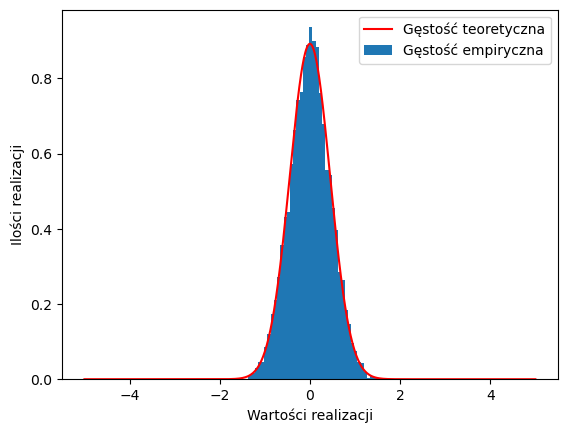

In [22]:
# gęstość
x = np.linspace(-5,5,1000)
plt.plot(x, st.norm.pdf(x, 0, np.sqrt(0.2)), label='Gęstość teoretyczna', color='r')
plt.hist(data, bins=50, density=True, label='Gęstość empiryczna')
plt.legend()
plt.xlabel('Wartości realizacji')
plt.ylabel('Ilości realizacji')
plt.show()

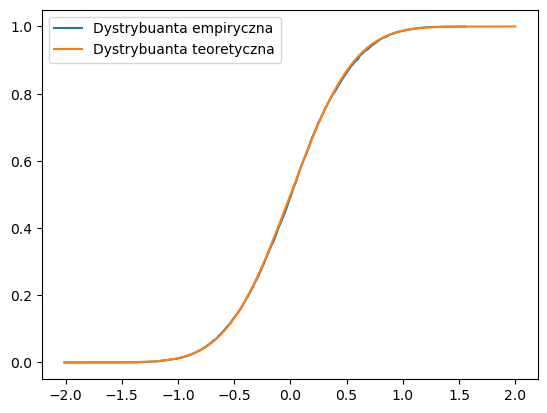

In [23]:
# dystrybuanta
x1 = np.linspace(-2,2,1000)
ecdf = ECDF(data)
plt.plot(ecdf.x, ecdf.y, label='Dystrybuanta empiryczna')
plt.plot(x1, st.norm.cdf(x1, 0, np.sqrt(0.2)), label='Dystrybuanta teoretyczna')
plt.legend()
plt.show()

In [24]:
# charakterystyki liczbowe
ex_emp = np.mean(data)
ex_teo = st.norm.mean(0, np.sqrt(0.2))
print('Wartości oczekiwane: empiryczna = ',ex_emp,'teoretyczna =', ex_teo)
var_emp = np.var(data)
var_teo = st.norm.var(0, np.sqrt(0.2))
print('Wariancje: empiryczna = ',var_emp,'teoretyczna =', var_teo)
skew_emp = st.skew(data)
skew_teo = 0
print('Skośności: empiryczna = ',skew_emp,'teoretyczna =', skew_teo)
kurt_emp = st.kurtosis(data)
kurt_teo = 0
print('Kurtozy: empiryczna = ',kurt_emp,'teoretyczna =', kurt_teo)

Wartości oczekiwane: empiryczna =  0.003975346636823869 teoretyczna = 0.0
Wariancje: empiryczna =  0.20167516285724202 teoretyczna = 0.19999999999999998
Skośności: empiryczna =  -0.009731974132027898 teoretyczna = 0
Kurtozy: empiryczna =  -0.05774601933600998 teoretyczna = 0


Text(0, 0.5, 'Wartość oczekiwana')

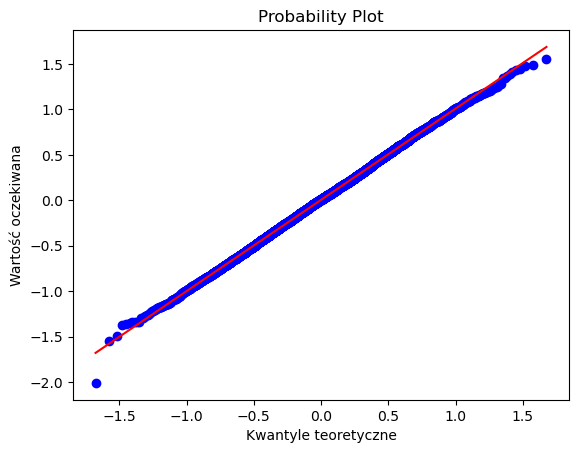

In [34]:
# qqplot
st.probplot(data, dist=st.norm(0,np.sqrt(0.2)), plot=pylab)
pylab.xlabel("Kwantyle teoretyczne")
pylab.ylabel("Wartość oczekiwana")